In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from statsmodels.api import OLS
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
communities_and_crime = fetch_ucirepo(id=183) 
X = communities_and_crime.data.features 
Y = communities_and_crime.data.targets 

In [5]:
X

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,?,0.01,0.28,0.05,?,?,?,?,0.00,?
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,?,0.02,0.37,0.20,?,?,?,?,0.00,?
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [7]:
Y

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1989,0.09
1990,0.45
1991,0.23
1992,0.19


In [9]:
X = X.drop(columns=["state", "county", "community", "communityname", "fold"])
X = X.replace('?',np.nan)

label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for i in categorical_columns:
    X[i] = label_encoder.fit_transform(X[i])

In [11]:
Y_centered = Y - Y.mean()
X_centered = X - X.mean(axis=0)

scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)

colnames =X.columns

In [13]:
# make a copy of origion data, If I mess around the data. I can use this instead of do the pre-pocessing again.
X1 = X
Y1 = Y

In [15]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,29,0.12,0.26,0.20,6,4,62,1,0.32,14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,77,0.02,0.12,0.45,63,38,72,3,0.00,51
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,77,0.01,0.21,0.02,63,38,72,3,0.00,51
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,77,0.02,0.39,0.28,63,38,72,3,0.00,51
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,77,0.04,0.09,0.02,63,38,72,3,0.00,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,77,0.01,0.28,0.05,63,38,72,3,0.00,51
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,77,0.02,0.37,0.20,63,38,72,3,0.00,51
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,25,0.08,0.32,0.18,8,6,50,0,0.91,28
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,19,0.03,0.38,0.33,2,2,51,0,0.22,18


In [21]:
# OLS
model_OLS = OLS(Y,X).fit()
model_OLS.summary()
OLS_features = X.columns[model_OLS.pvalues < 0.05]
print(OLS_features)

Index(['racepctblack', 'pctUrban', 'pctWFarmSelf', 'pctWInvInc', 'pctWRetire',
       'whitePerCap', 'PctPopUnderPov', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'PctWorkMom', 'PctIlleg',
       'NumImmig', 'PctNotSpeakEnglWell', 'PersPerOccupHous',
       'PersPerRentOccHous', 'PctPersDenseHous', 'PctHousLess3BR',
       'HousVacant', 'PctVacMore6Mos', 'RentLowQ', 'MedRent',
       'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'LemasSwornFT',
       'PolicOperBudg', 'PolicBudgPerPop'],
      dtype='object')


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# 假设你已有标准化数据 X_standardized 和标签 Y
X_df = pd.DataFrame(X_standardized, columns=colnames)
Y_series = Y.values.flatten() if hasattr(Y, "values") else Y

# Pearson 线性相关性
pearson_corr = X_df.corrwith(pd.Series(Y_series))
pearson_corr_abs = pearson_corr.abs().sort_values(ascending=False)

# 互信息（非线性相关性）
mi_scores = mutual_info_regression(X_df, Y_series, random_state=0)
mi_scores = pd.Series(mi_scores, index=X_df.columns).sort_values(ascending=False)

In [50]:
# 创建 DataFrame 汇总两个指标
correlation_table = pd.DataFrame({
    "Pearson": pearson_corr,                 # 原始线性相关系数（可正可负）
    "Pearson_abs": pearson_corr_abs,         # 绝对值，用于排名
    "Mutual_Info": mi_scores                 # 互信息分数（越高越重要）
})
# 根据任意一列排序，例如按 Pearson 绝对值排序
correlation_table_sorted = correlation_table.sort_values(by="Pearson_abs", ascending=False)
# 显示前 15 个变量（你可以调节）
#correlation_table_sorted.head(15)
#correlation_table_sorted.to_csv("correlation_table_sorted.csv", index=True)

In [60]:
# 创建标签列：强 or 弱 相关变量
correlation_table_labeled = correlation_table.copy()
correlation_table_labeled["Selected"] = (
    ~((correlation_table_labeled["Mutual_Info"] < 0.15) & 
      (correlation_table_labeled["Pearson_abs"] < 0.4))
).astype(int)  # 满足条件的记为 False，用 ~ 取反后转为 1/0
# 查看前几行确认结果
correlation_table_labeled.head(15)
#correlation_table_labeled.to_csv("correlation_table_labeled.csv", index=True)

,Pearson,Pearson_abs,Mutual_Info,Selected
AsianPerCap,-0.155592,0.155592,0.072634,0
FemalePctDiv,0.556032,0.556032,0.278966,1
HispPerCap,-0.244553,0.244553,0.060211,0
HousVacant,0.421396,0.421396,0.157662,1
LandArea,0.196800,0.196800,0.001733,0
LemasGangUnitDeploy,-0.330183,0.330183,0.104342,0
LemasPctOfficDrugUn,0.348627,0.348627,0.062080,0
LemasPctPolicOnPatr,-0.342092,0.342092,0.083848,0
LemasSwFTFieldOps,-0.398444,0.398444,0.109442,0
LemasSwFTFieldPerPop,-0.325302,0.325302,0.074517,0


C:\Users\17376\AppData\Local\Temp\ipykernel_22676\1398775302.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\17376\AppData\Local\Temp\ipykernel_22676\1398775302.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


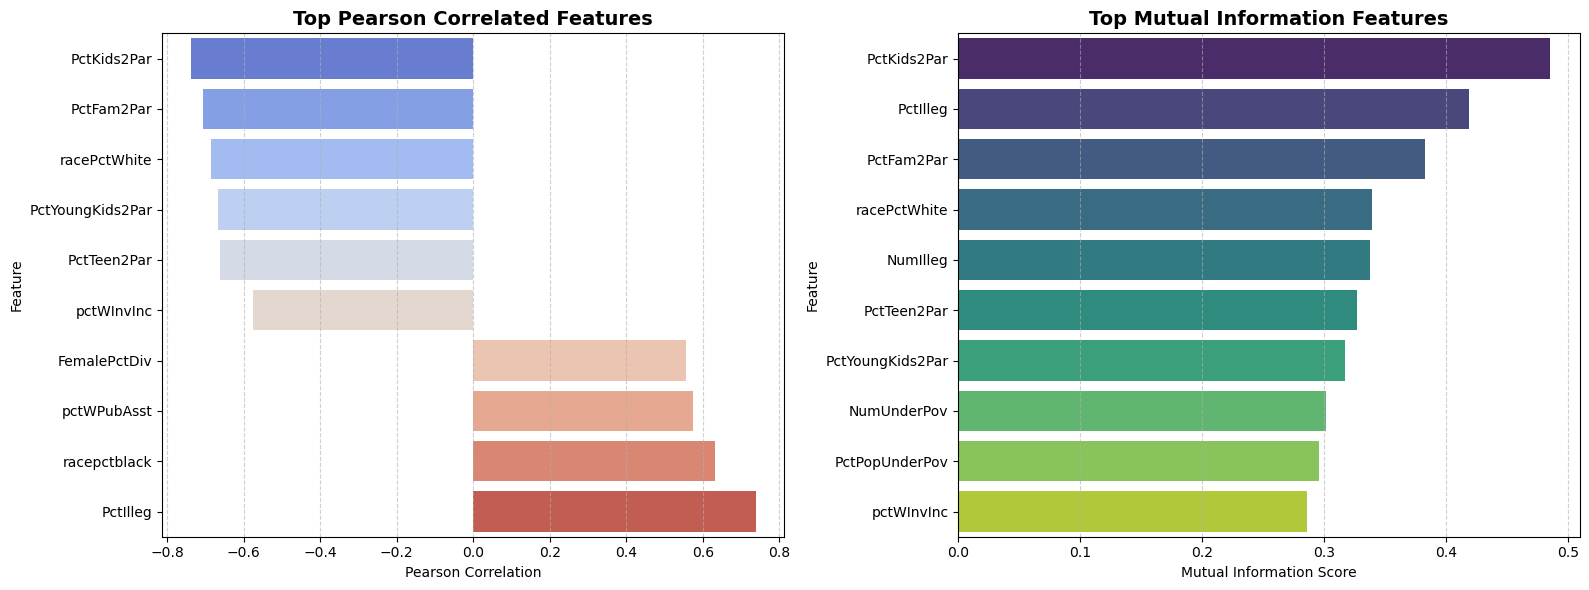

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# 取 Top 10 变量
top_k = 10
top_pearson = pearson_corr.loc[pearson_corr_abs.head(top_k).index].sort_values()
top_mi = mi_scores.head(top_k)

# 设置画布
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 🎯 子图1：Pearson
sns.barplot(
    x=top_pearson.values,
    y=top_pearson.index,
    palette="coolwarm",
    ax=axes[0]
)
axes[0].set_title("Top Pearson Correlated Features", fontsize=14, weight='bold')
axes[0].set_xlabel("Pearson Correlation")
axes[0].set_ylabel("Feature")
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# 🎯 子图2：Mutual Info
sns.barplot(
    x=top_mi.values,
    y=top_mi.index,
    palette="viridis",
    ax=axes[1]
)
axes[1].set_title("Top Mutual Information Features", fontsize=14, weight='bold')
axes[1].set_xlabel("Mutual Information Score")
axes[1].set_ylabel("Feature")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# 收尾
plt.tight_layout()
plt.show()


In [40]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


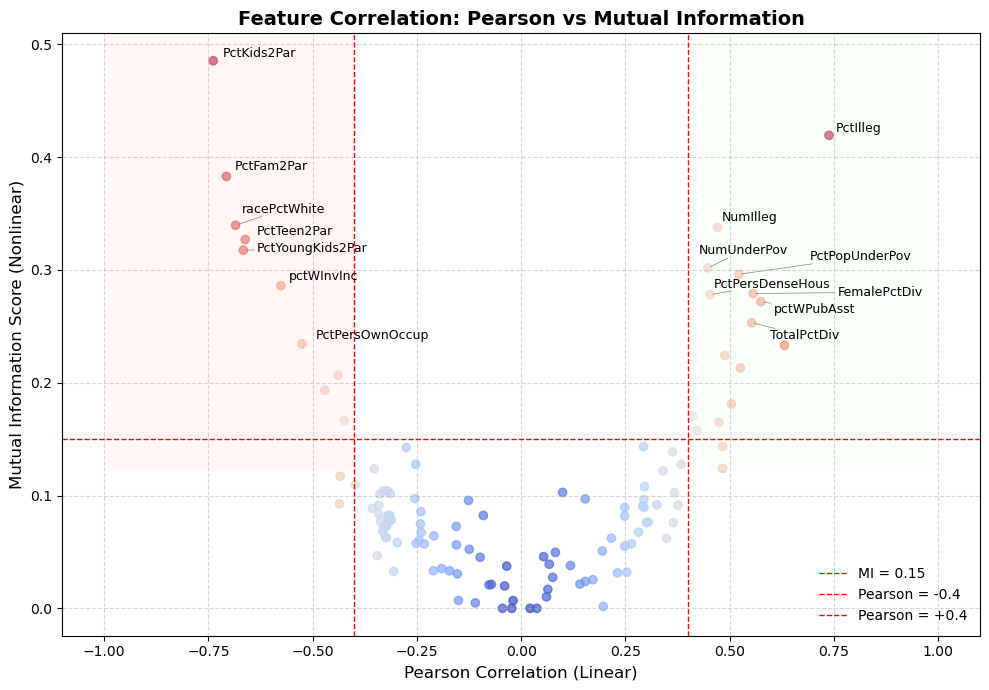

In [48]:
from adjustText import adjust_text
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# 散点图
sc = plt.scatter(
    correlation_table["Pearson"],
    correlation_table["Mutual_Info"],
    alpha=0.7,
    c=correlation_table["Pearson_abs"],
    cmap="coolwarm"
)

# 标题和坐标轴
plt.title("Feature Correlation: Pearson vs Mutual Information", fontsize=14, weight='bold')
plt.xlabel("Pearson Correlation (Linear)", fontsize=12)
plt.ylabel("Mutual Information Score (Nonlinear)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# 背景色区域：左上（线性弱、非线性强）与右上（线性非线性都强）
plt.axvspan(xmin=-1, xmax=-0.4, ymin=0.15/0.55, ymax=1, facecolor='mistyrose', alpha=0.3)
plt.axvspan(xmin=0.4, xmax=1, ymin=0.15/0.55, ymax=1, facecolor='honeydew', alpha=0.3)

# 辅助线
plt.axhline(y=0.15, color='red', linestyle='--', linewidth=1, label='MI = 0.15')
plt.axvline(x=-0.4, color='red', linestyle='--', linewidth=1, label='Pearson = -0.4')
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=1, label='Pearson = +0.4')

# 标注前15的变量
texts = []
top_features = correlation_table.sort_values("Mutual_Info", ascending=False).head(15).index
for feature in top_features:
    x = correlation_table.loc[feature, "Pearson"]
    y = correlation_table.loc[feature, "Mutual_Info"]
    texts.append(plt.text(x, y, feature, fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# ✅ 图例移到右下角
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()
plt.show()




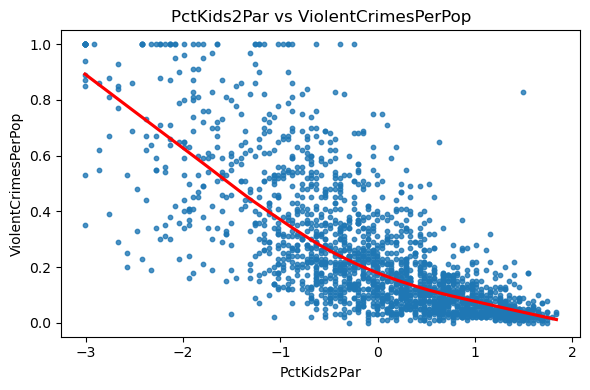

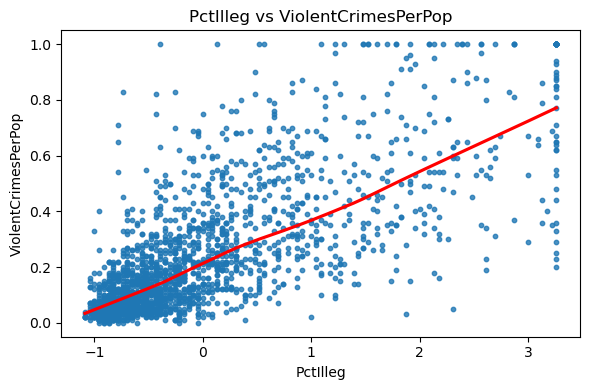

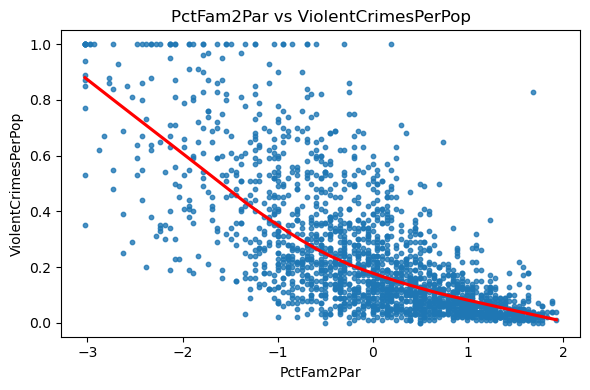

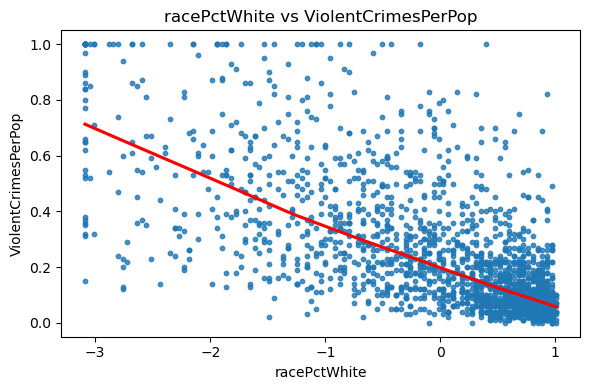

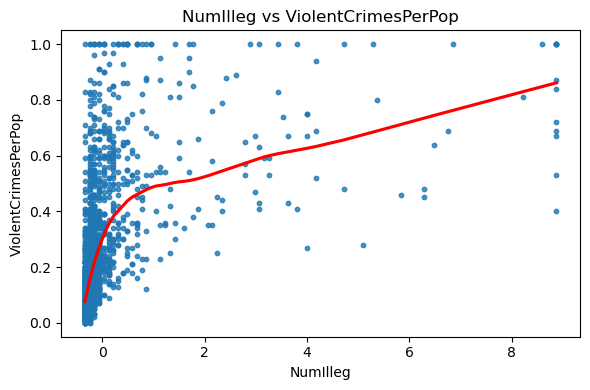

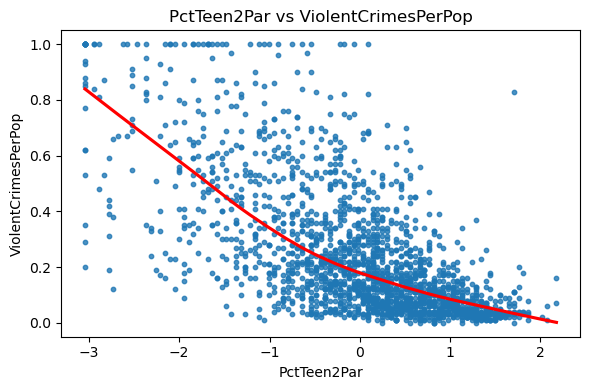

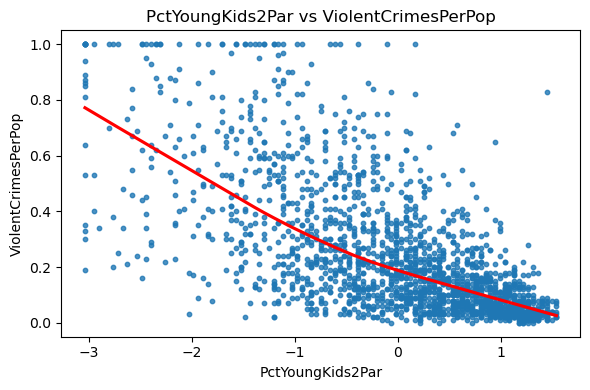

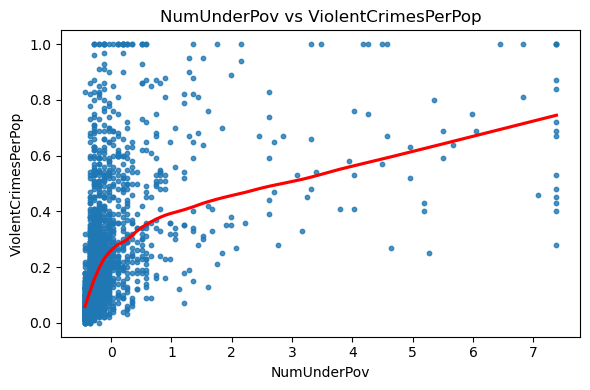

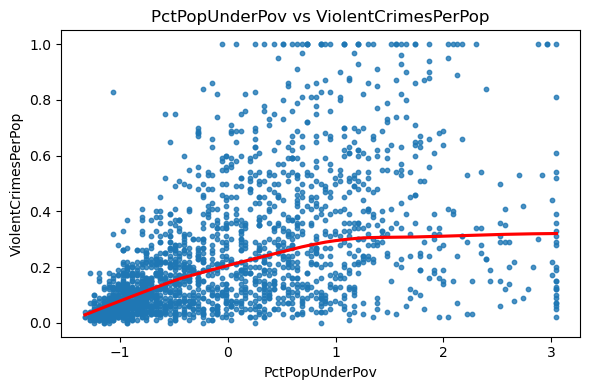

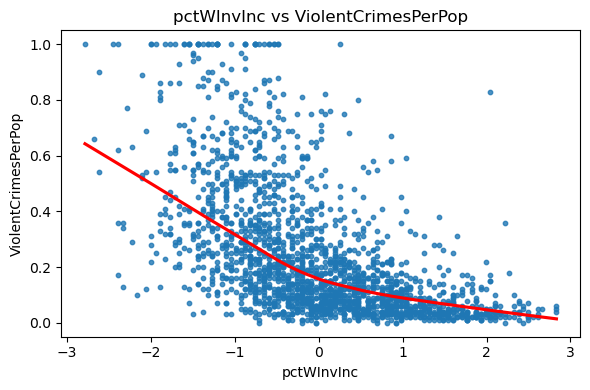

In [17]:
# 选出互信息排名前 top_k 个变量，绘制散点图看趋势
import seaborn as sns

for feature in mi_scores.head(top_k).index:
    plt.figure(figsize=(6,4))
    sns.regplot(x=X_df[feature], y=Y_series, lowess=True, scatter_kws={"s":10}, line_kws={"color":"red"})
    plt.title(f"{feature} vs ViolentCrimesPerPop")
    plt.xlabel(feature)
    plt.ylabel("ViolentCrimesPerPop")
    plt.tight_layout()
    plt.show()


In [68]:
# 设定条件：|Pearson| > 0.4 或 Mutual_Info > 0.15
condition = (correlation_table["Pearson_abs"] > 0.4) | (correlation_table["Mutual_Info"] > 0.15)
correlation_selected = correlation_table[condition].copy()
selected_variable_names = correlation_selected.index.tolist()
print(selected_variable_names)

['FemalePctDiv', 'HousVacant', 'MalePctDivorce', 'NumIlleg', 'NumUnderPov', 'PctFam2Par', 'PctHousLess3BR', 'PctHousNoPhone', 'PctHousOwnOcc', 'PctIlleg', 'PctKids2Par', 'PctLess9thGrade', 'PctNotHSGrad', 'PctPersDenseHous', 'PctPersOwnOccup', 'PctPolicWhite', 'PctPopUnderPov', 'PctTeen2Par', 'PctUnemployed', 'PctVacantBoarded', 'PctYoungKids2Par', 'RacialMatchCommPol', 'TotalPctDiv', 'medFamInc', 'medIncome', 'pctWInvInc', 'pctWPubAsst', 'racePctWhite', 'racepctblack']


In [84]:
forward_selected = [
    'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29', 'agePct16t24',
    'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
    'pctWSocSec', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy',
    'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
    'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
    'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
    'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
    'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', 'OwnOccMedVal',
    'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctSameCity85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
    'LemasTotalReq', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
    'PctPolicWhite', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'PctUsePubTrans',
    'PolicOperBudg', 'LemasGangUnitDeploy', 'PolicBudgPerPop'
]
backward_selected = [
    'racepctblack', 'racePctHisp', 'agePct12t29', 'pctUrban', 'pctWWage',
    'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc',
    'whitePerCap', 'indianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov',
    'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu',
    'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv',
    'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig', 'PctNotSpeakEnglWell',
    'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup',
    'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart',
    'OwnOccMedVal', 'RentLowQ', 'MedRent', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasTotalReq',
    'PolicReqPerOffic', 'PolicPerPop', 'PctPolicAsian', 'OfficAssgnDrugUnits',
    'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasGangUnitDeploy',
    'PolicBudgPerPop'
]

In [86]:
combined_variables = list(set(selected_variable_names) | set(forward_selected) | set(backward_selected))
X_selected = X[combined_variables]

In [88]:
X_selected

,LemasGangUnitDeploy,PctHousOccup,TotalPctDiv,blackPerCap,LemasTotalReq,PolicOperBudg,pctWFarmSelf,NumUnderPov,HispPerCap,racepctblack,...,LemasSwFTFieldOps,AsianPerCap,pctUrban,PersPerOccupHous,PctPopUnderPov,HousVacant,PctBSorMore,PctTeen2Par,OtherPerCap,agePct12t29
0,1,0.71,0.75,0.32,6,4,0.34,0.08,0.41,0.02,...,29,0.27,1.0,0.33,0.19,0.21,0.48,0.56,36,0.47
1,3,0.79,1.00,0.33,44,38,0.11,0.01,0.35,0.12,...,34,0.30,1.0,0.17,0.24,0.02,0.30,0.39,22,0.59
2,3,0.86,0.70,0.27,44,38,0.19,0.01,0.39,0.49,...,34,0.29,0.0,0.46,0.27,0.01,0.19,0.43,28,0.47
3,3,0.97,0.44,0.39,44,38,0.21,0.01,0.44,1.00,...,34,0.25,1.0,0.85,0.10,0.01,0.31,0.65,36,0.50
4,3,0.89,0.21,0.28,44,38,0.16,0.00,0.48,0.02,...,34,0.74,0.9,0.59,0.06,0.01,0.33,0.85,51,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,3,0.75,0.53,0.27,44,38,0.14,0.01,0.52,0.10,...,34,0.16,1.0,0.41,0.16,0.02,0.65,0.59,36,0.51
1990,3,0.80,0.48,0.26,44,38,0.10,0.04,0.26,0.46,...,34,0.20,1.0,0.74,0.32,0.03,0.22,0.70,23,0.86
1991,0,0.65,0.52,0.25,4,6,0.17,0.12,0.28,0.25,...,26,0.28,1.0,0.39,0.31,0.21,0.21,0.47,22,0.50
1992,0,0.84,0.32,0.29,1,2,0.21,0.03,0.37,0.06,...,30,0.31,1.0,0.36,0.16,0.05,0.42,0.71,27,0.74


In [90]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

C:\Users\17376\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


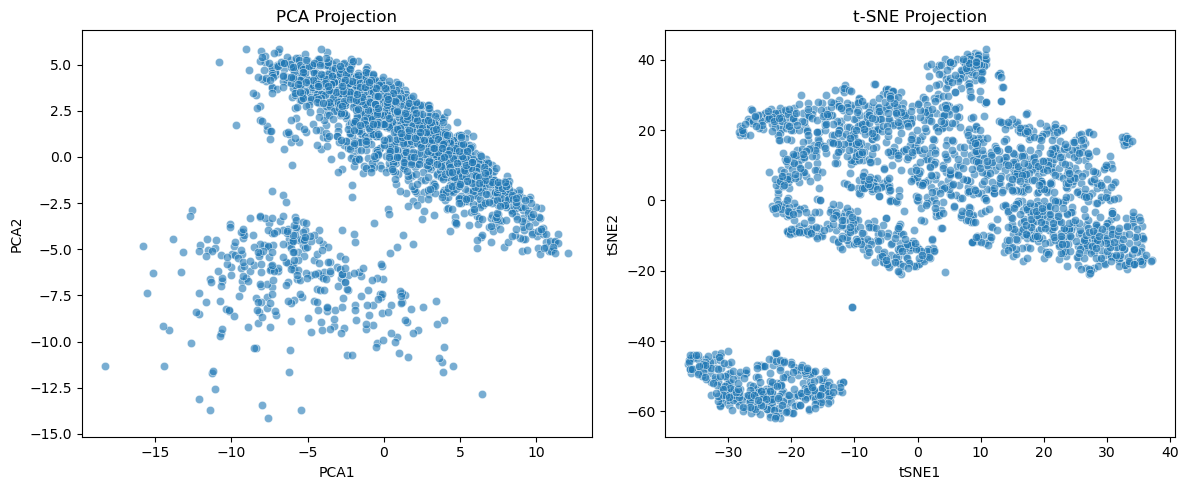

In [94]:
# PCA 降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
# t-SNE 降维
tsne = TSNE(n_components=2, perplexity=50, n_iter=2000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne_df = pd.DataFrame(X_tsne, columns=["tSNE1", "tSNE2"])
# 可视化
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=X_pca_df, x="PCA1", y="PCA2", alpha=0.6)
plt.title("PCA Projection")
plt.subplot(1, 2, 2)
sns.scatterplot(data=X_tsne_df, x="tSNE1", y="tSNE2", alpha=0.6)
plt.title("t-SNE Projection")
plt.tight_layout()
plt.show()

In [100]:
!pip install umap-learn

C:\Users\17376\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


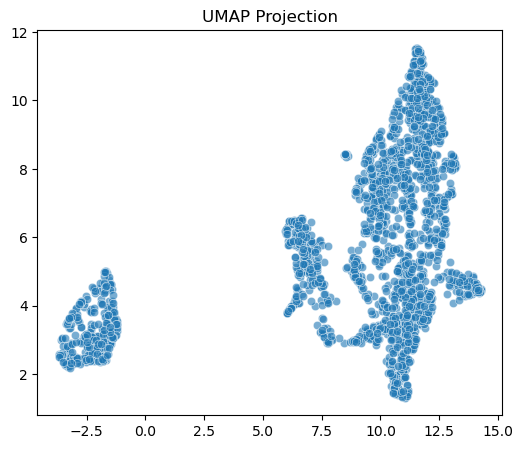

In [102]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# 可视化
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], alpha=0.6)
plt.title("UMAP Projection")
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

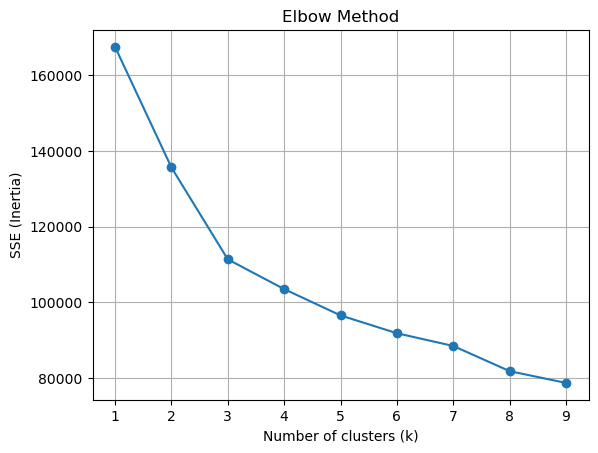

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sse.append(km.inertia_)  # inertia_ = 簇内误差平方和

plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

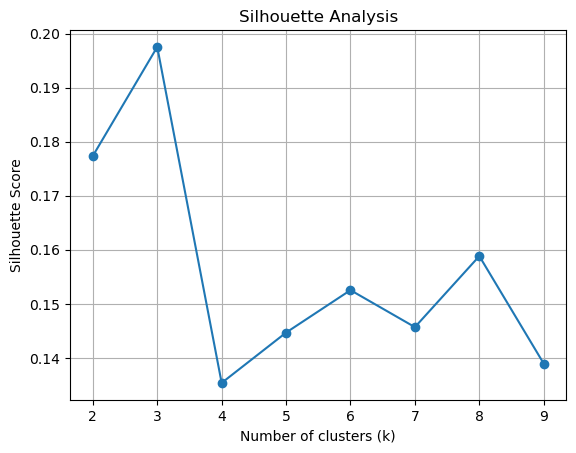

In [106]:
from sklearn.metrics import silhouette_score

scores = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

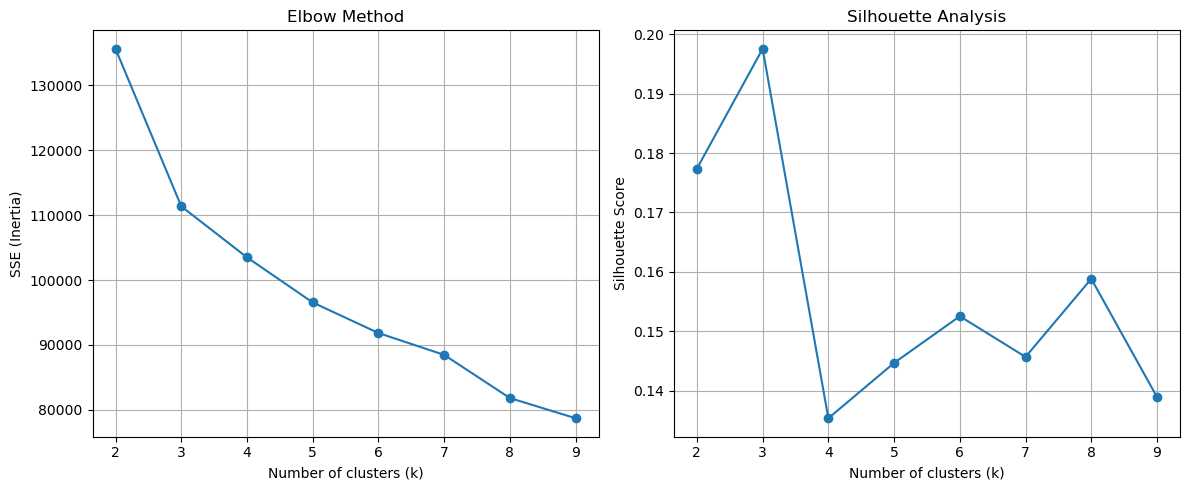

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    sse.append(km.inertia_)
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_scores.append(score)

# 画图
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method
axes[0].plot(K_range, sse, marker='o')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('SSE (Inertia)')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, marker='o')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
axes[1].grid(True)

plt.tight_layout()
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


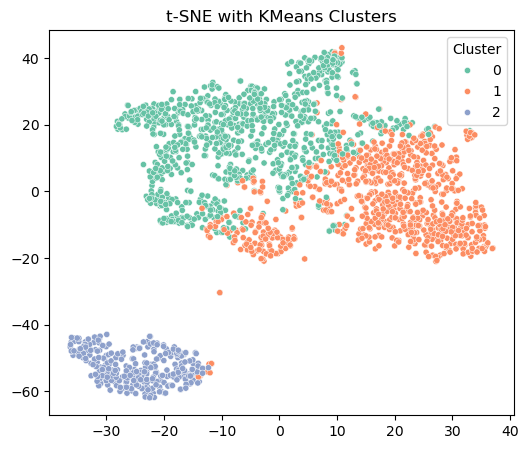

In [98]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 在 t-SNE 图中可视化聚类
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2', s=20)
plt.title("t-SNE with KMeans Clusters")
plt.legend(title='Cluster')
plt.show()


In [108]:
X_selected['cluster'] = labels
cluster_summary = X_selected.groupby('cluster').mean().T
cluster_summary['std'] = cluster_summary.std(axis=1)
top_diff_vars = cluster_summary.sort_values(by='std', ascending=False).head(15)


C:\Users\17376\AppData\Local\Temp\ipykernel_22676\1105209033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['cluster'] = labels


In [112]:
cluster_summary

cluster,0,1,2,std
LemasGangUnitDeploy,3.000000,2.974522,0.883871,1.214460
PctHousOccup,0.671513,0.795796,0.665774,0.073468
TotalPctDiv,0.562325,0.370127,0.611290,0.127474
blackPerCap,0.206062,0.404688,0.250065,0.104321
LemasTotalReq,44.000000,43.475159,8.222581,20.506273
...,...,...,...,...
HousVacant,0.046541,0.030510,0.281871,0.140724
PctBSorMore,0.251769,0.494064,0.345161,0.122203
PctTeen2Par,0.512925,0.722879,0.431258,0.150440
OtherPerCap,21.957731,36.403822,26.935484,7.338449


In [116]:
top_vars_per_cluster = {}

for c in cluster_summary.columns[:-1]:  # 排除 'std' 列
    sorted_vars = cluster_summary[c].sort_values(ascending=False).index.tolist()
    top_vars_per_cluster[c] = sorted_vars

# 示例：输出每一类的变量名（已排序）
for cluster_id, var_list in top_vars_per_cluster.items():
    print(f"Cluster {cluster_id} variables (sorted):")
    print(var_list)
    print()


Cluster 0 variables (sorted):
['RacialMatchCommPol', 'PolicReqPerOffic', 'PctPolicWhite', 'PolicCars', 'LemasSwFTPerPop', 'PolicPerPop', 'PolicBudgPerPop', 'PctPolicAsian', 'LemasTotalReq', 'LemasSwornFT', 'PolicOperBudg', 'LemasSwFTFieldOps', 'OfficAssgnDrugUnits', 'OtherPerCap', 'LemasGangUnitDeploy', 'racePctWhite', 'PctHousOccup', 'PctSameCity85', 'PctHousLess3BR', 'TotalPctDiv', 'PctYoungKids2Par', 'FemalePctDiv', 'pctWSocSec', 'MalePctDivorce', 'agePct12t29', 'PctKids2Par', 'PctWorkMom', 'MedRentPctHousInc', 'PctFam2Par', 'PctTeen2Par', 'PctOccupManu', 'PctNotHSGrad', 'pctWRetire', 'PctHousOwnOcc', 'PctPersOwnOccup', 'pctWWage', 'PctVacMore6Mos', 'pctUrban', 'PctUnemployed', 'PctPopUnderPov', 'MalePctNevMarr', 'PersPerRentOccHous', 'PersPerOccupHous', 'pctWPubAsst', 'PctLess9thGrade', 'PctEmplManu', 'PctHousNoPhone', 'PctEmploy', 'MedOwnCostPctIncNoMtg', 'pctWInvInc', 'MedOwnCostPctInc', 'agePct16t24', 'PctOccupMgmtProf', 'pctWFarmSelf', 'PctIlleg', 'HispPerCap', 'PctLargHouseOcc

In [23]:
communities_and_crime = fetch_ucirepo(id=183) 
X = communities_and_crime.data.features 
Y = communities_and_crime.data.targets 

In [25]:
X

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,?,0.01,0.28,0.05,?,?,?,?,0.00,?
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,?,0.02,0.37,0.20,?,?,?,?,0.00,?
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.25,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.19,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18


In [21]:
import pandas as pd
# 先重命名一下Y（如果你想的话）
Y = Y.rename(columns={"ViolentCrimesPerPop": "target"})
# 按顺序合并：先Y后X
df = pd.concat([Y, X], axis=1)
# 查看前几行确认
print(df.head())

   target  population  householdsize  racepctblack  racePctWhite  \
0    0.20        0.19           0.33          0.02          0.90   
1    0.67        0.00           0.16          0.12          0.74   
2    0.43        0.00           0.42          0.49          0.56   
3    0.12        0.04           0.77          1.00          0.08   
4    0.03        0.01           0.55          0.02          0.95   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
0          0.12         0.17         0.34         0.47         0.29  ...   
1          0.45         0.07         0.26         0.59         0.35  ...   
2          0.17         0.04         0.39         0.47         0.28  ...   
3          0.12         0.10         0.51         0.50         0.34  ...   
4          0.09         0.05         0.38         0.38         0.23  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0                29      0.12     0.26            0.20          6

In [27]:
print(df.head())

   target  population  householdsize  racepctblack  racePctWhite  \
0    0.20        0.19           0.33          0.02          0.90   
1    0.67        0.00           0.16          0.12          0.74   
2    0.43        0.00           0.42          0.49          0.56   
3    0.12        0.04           0.77          1.00          0.08   
4    0.03        0.01           0.55          0.02          0.95   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  agePct16t24  ...  \
0          0.12         0.17         0.34         0.47         0.29  ...   
1          0.45         0.07         0.26         0.59         0.35  ...   
2          0.17         0.04         0.39         0.47         0.28  ...   
3          0.12         0.10         0.51         0.50         0.34  ...   
4          0.09         0.05         0.38         0.38         0.23  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0                29      0.12     0.26            0.20          6

In [29]:
#缺失值分析
import numpy as np
# 将'?'替换为np.nan
X = X.replace('?', np.nan)
# 每一列缺失的数量
missing_count = X.isnull().sum()

# 每一列缺失的比例
missing_rate = missing_count / len(X)

# 合成一个表格更好看
missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_rate': missing_rate
}).sort_values(by='missing_rate', ascending=False)

print(missing_df)


                   missing_count  missing_rate
PolicBudgPerPop             1675       0.84002
PctPolicMinor               1675       0.84002
LemasSwornFT                1675       0.84002
LemasSwFTPerPop             1675       0.84002
LemasSwFTFieldOps           1675       0.84002
...                          ...           ...
PctEmploy                      0       0.00000
PctUnemployed                  0       0.00000
PctBSorMore                    0       0.00000
PctNotHSGrad                   0       0.00000
PctRecImmig8                   0       0.00000

[127 rows x 2 columns]


In [34]:
# 只取缺失率 > 0 的列
missing_df_nonzero = missing_df[missing_df['missing_rate'] > 0]
print(missing_df_nonzero)

                      missing_count  missing_rate
PolicBudgPerPop                1675      0.840020
PctPolicMinor                  1675      0.840020
LemasSwornFT                   1675      0.840020
LemasSwFTPerPop                1675      0.840020
LemasSwFTFieldOps              1675      0.840020
LemasSwFTFieldPerPop           1675      0.840020
LemasTotalReq                  1675      0.840020
PolicReqPerOffic               1675      0.840020
PolicPerPop                    1675      0.840020
RacialMatchCommPol             1675      0.840020
PctPolicWhite                  1675      0.840020
PctPolicBlack                  1675      0.840020
PctPolicHisp                   1675      0.840020
PctPolicAsian                  1675      0.840020
LemasTotReqPerPop              1675      0.840020
OfficAssgnDrugUnits            1675      0.840020
PolicCars                      1675      0.840020
NumKindsDrugsSeiz              1675      0.840020
LemasGangUnitDeploy            1675      0.840020


In [38]:
#对Y进行分析
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, shapiro
# 1. 基本描述统计
print("Basic Statistics of ViolentCrimesPerPop (target):")
print(df['target'].describe())
print()

Basic Statistics of ViolentCrimesPerPop (target):
count    1994.000000
mean        0.237979
std         0.232985
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: target, dtype: float64



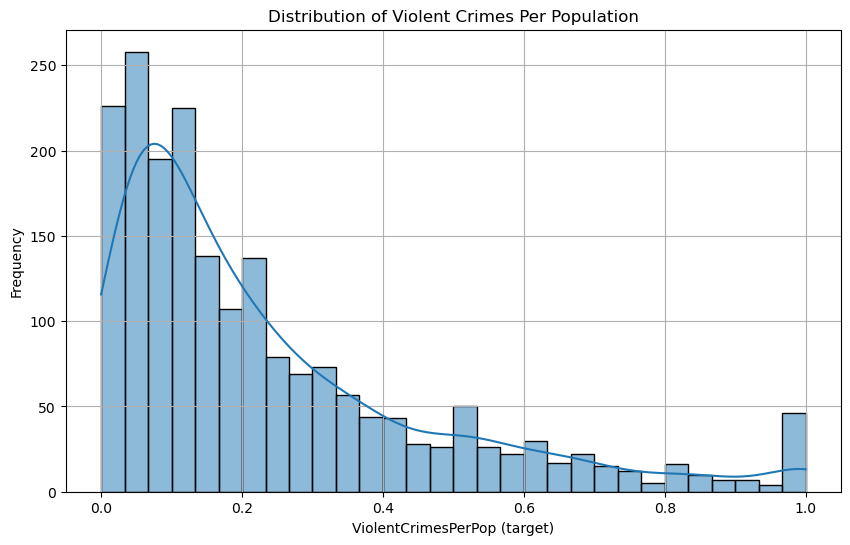

In [40]:
# 2. 分布图（直方图 + 密度曲线）
plt.figure(figsize=(10,6))
sns.histplot(df['target'], kde=True, bins=30)
plt.title('Distribution of Violent Crimes Per Population')
plt.xlabel('ViolentCrimesPerPop (target)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [42]:
# 3. 查看偏度（Skewness）和峰度（Kurtosis）
print(f"Skewness: {skew(df['target'])}")
print(f"Kurtosis: {kurtosis(df['target'])}")

Skewness: 1.5214528610934535
Kurtosis: 1.8256666996398039


In [44]:
# 4. 正态性检验（Shapiro-Wilk Test）
stat, p_value = shapiro(df['target'])
print(f"Shapiro-Wilk Test p-value: {p_value}")

if p_value < 0.05:
    print("=> Data is likely NOT normally distributed (reject H0)")
else:
    print("=> Data looks like normally distributed (fail to reject H0)")

Shapiro-Wilk Test p-value: 1.6965644080309282e-42
=> Data is likely NOT normally distributed (reject H0)


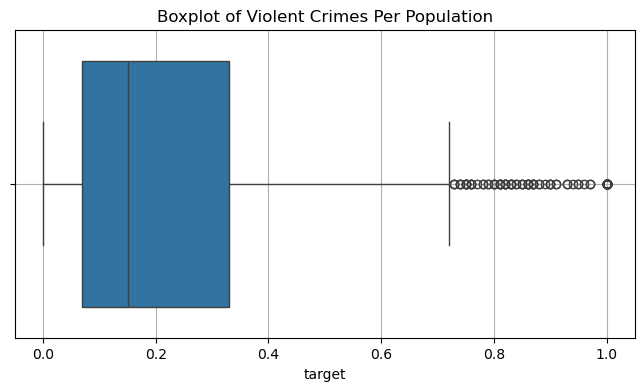

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['target'])
plt.title('Boxplot of Violent Crimes Per Population')
plt.grid(True)
plt.show()

In [48]:
# 计算四分位数和IQR
Q1 = df['target'].quantile(0.25)
Q3 = df['target'].quantile(0.75)
IQR = Q3 - Q1

# 计算离群值上界
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25%分位数): {Q1}")
print(f"Q3 (75%分位数): {Q3}")
print(f"IQR (四分位间距): {IQR}")
print(f"离群值上界（大于这个值就是红框内）: {upper_bound}")


Q1 (25%分位数): 0.07
Q3 (75%分位数): 0.33
IQR (四分位间距): 0.26
离群值上界（大于这个值就是红框内）: 0.72


In [50]:
# 假设原始X叫 X_raw，Y叫 Y
# 如果X_raw和Y是分开的，先合并
df_full = pd.concat([Y, X], axis=1)
# 筛选出 target > 0.72 的地区
high_crime_areas = df_full[df_full['ViolentCrimesPerPop'] > 0.72]
# 只保留地理信息列
geo_info = high_crime_areas[['state', 'county', 'community', 'communityname']]
# 查看结果
print(geo_info)


      state county community     communityname
26        6    NaN       NaN       Gardenacity
42        1    NaN       NaN     Fairfieldcity
79        8    NaN       NaN        Auroracity
82       48    NaN       NaN        Vernoncity
116       6    NaN       NaN     Inglewoodcity
...     ...    ...       ...               ...
1847     34     13     51000        Newarkcity
1865     12    NaN       NaN       Orlandocity
1878     25      9     34550      Lawrencecity
1957      5    NaN       NaN    LittleRockcity
1969      6    NaN       NaN  SanFranciscocity

[110 rows x 4 columns]


In [54]:
!pip install geopy

In [60]:
# FIPS州编码映射
state_fips_mapping = {
    1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 6: 'California',
    8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 12: 'Florida', 13: 'Georgia',
    17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 21: 'Kentucky',
    22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan',
    27: 'Minnesota', 28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska',
    32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 36: 'New York',
    37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon',
    42: 'Pennsylvania', 44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota',
    47: 'Tennessee', 48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia',
    53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'
}

# 加一列州名字
geo_info['state_name'] = geo_info['state'].map(state_fips_mapping)


C:\Users\17376\AppData\Local\Temp\ipykernel_33804\291776650.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_info['state_name'] = geo_info['state'].map(state_fips_mapping)


In [62]:
# 生成 "城市, 州" 格式的字符串
geo_info['full_location'] = geo_info['communityname'].str.replace('city', '', regex=False) + ', ' + geo_info['state_name']

# 看一下
print(geo_info[['communityname', 'state_name', 'full_location']])


         communityname     state_name             full_location
26         Gardenacity     California       Gardena, California
42       Fairfieldcity        Alabama        Fairfield, Alabama
79          Auroracity       Colorado          Aurora, Colorado
82          Vernoncity          Texas             Vernon, Texas
116      Inglewoodcity     California     Inglewood, California
...                ...            ...                       ...
1847        Newarkcity     New Jersey        Newark, New Jersey
1865       Orlandocity        Florida          Orlando, Florida
1878      Lawrencecity  Massachusetts   Lawrence, Massachusetts
1957    LittleRockcity       Arkansas      LittleRock, Arkansas
1969  SanFranciscocity     California  SanFrancisco, California

[110 rows x 3 columns]


C:\Users\17376\AppData\Local\Temp\ipykernel_33804\2013651236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_info['full_location'] = geo_info['communityname'].str.replace('city', '', regex=False) + ', ' + geo_info['state_name']


In [64]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="crime_mapping")

def get_lat_lon(location):
    try:
        loc = geolocator.geocode(location)
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
        else:
            return pd.Series([None, None])
    except:
        return pd.Series([None, None])

# 查经纬度
geo_info[['latitude', 'longitude']] = geo_info['full_location'].apply(lambda x: get_lat_lon(x))
time.sleep(1)

# 查看
print(geo_info[['full_location', 'latitude', 'longitude']])


C:\Users\17376\AppData\Local\Temp\ipykernel_33804\3821317342.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_info[['latitude', 'longitude']] = geo_info['full_location'].apply(lambda x: get_lat_lon(x))
C:\Users\17376\AppData\Local\Temp\ipykernel_33804\3821317342.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_info[['latitude', 'longitude']] = geo_info['full_location'].apply(lambda x: get_lat_lon(x))


                 full_location   latitude   longitude
26         Gardena, California  33.881570 -118.291811
42          Fairfield, Alabama  33.491684  -86.915028
79            Aurora, Colorado  39.740511 -104.830994
82               Vernon, Texas  34.151311  -99.286086
116      Inglewood, California  33.956200 -118.353132
...                        ...        ...         ...
1847        Newark, New Jersey  40.735657  -74.172367
1865          Orlando, Florida  28.542111  -81.379030
1878   Lawrence, Massachusetts  42.707035  -71.163114
1957      LittleRock, Arkansas        NaN         NaN
1969  SanFrancisco, California        NaN         NaN

[110 rows x 3 columns]


In [68]:
!pip install folium

In [70]:
import folium

# 创建基础地图
map_crime = folium.Map(location=[39.5, -98.35], zoom_start=4)

# 打点
for idx, row in geo_info.dropna(subset=['latitude', 'longitude']).iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        popup=row['full_location'],
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(map_crime)

# 展示
map_crime


In [74]:
!pip install cartopy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------------------------- ---- 9.7/11.0 MB 50.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 45.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 48.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 45.2 MB/s eta 0:00:00


C:\Users\17376\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\17376\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\17376\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


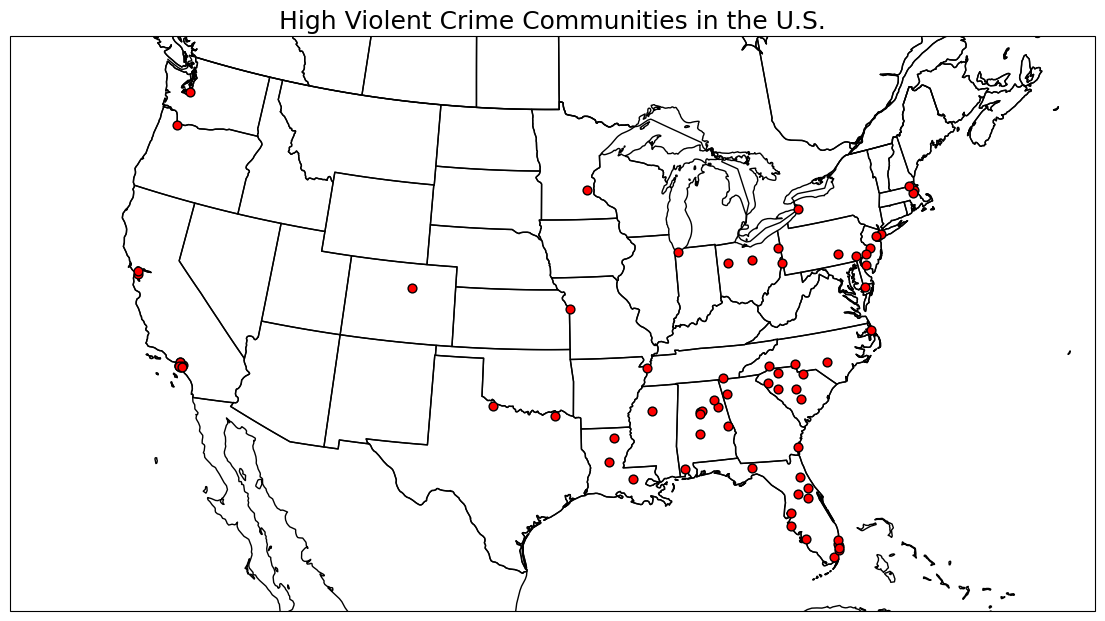

In [76]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 筛选掉没有经纬度的
geo_info_clean = geo_info.dropna(subset=['latitude', 'longitude'])

# 创建画布
fig = plt.figure(figsize=(14, 10))

# 设置投影方式
ax = plt.axes(projection=ccrs.LambertConformal())

# 设定美国区域经纬度范围
ax.set_extent([-125, -66.5, 24, 49.5], crs=ccrs.PlateCarree())  # 美国本土范围

# 加州界线
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=1)

# 加国家边界
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=1)

# 加海岸线
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

# 加点
ax.scatter(
    geo_info_clean['longitude'], 
    geo_info_clean['latitude'],
    color='red', 
    s=40,  # 点大小
    edgecolor='black', 
    transform=ccrs.PlateCarree(),
    zorder=5
)

# 标题
plt.title('High Violent Crime Communities in the U.S.', fontsize=18)

# 展示
plt.show()


In [81]:
# 合并，按行索引自动对齐
df_full = pd.concat([Y, X], axis=1)

# 查看合并后的数据
print(df_full.head())
print(df_full.shape)


   ViolentCrimesPerPop  state county community        communityname  fold  \
0                 0.20      8    NaN       NaN         Lakewoodcity     1   
1                 0.67     53    NaN       NaN          Tukwilacity     1   
2                 0.43     24    NaN       NaN         Aberdeentown     1   
3                 0.12     34      5     81440  Willingborotownship     1   
4                 0.03     42     95      6096    Bethlehemtownship     1   

   population  householdsize  racepctblack  racePctWhite  ...  \
0        0.19           0.33          0.02          0.90  ...   
1        0.00           0.16          0.12          0.74  ...   
2        0.00           0.42          0.49          0.56  ...   
3        0.04           0.77          1.00          0.08  ...   
4        0.01           0.55          0.02          0.95  ...   

   PolicAveOTWorked  LandArea  PopDens  PctUsePubTrans  PolicCars  \
0              0.29      0.12     0.26            0.20       0.06   
1       

In [89]:
# 2. 按 state 分组，计算平均犯罪率
state_crime_avg = df_full.groupby('state')['ViolentCrimesPerPop'].mean().reset_index()

# 3. 映射出州名字
state_crime_avg['state_name'] = state_crime_avg['state'].map(state_fips_mapping)

# 4. 重新调整列顺序
state_crime_avg = state_crime_avg[['state', 'state_name', 'ViolentCrimesPerPop']]

# 只保留state_name非空的记录
state_crime_avg_clean = state_crime_avg.dropna(subset=['state_name'])

# 查看清理后的结果
print(state_crime_avg_clean)


    state      state_name  ViolentCrimesPerPop
0       1         Alabama             0.393721
1       2          Alaska             0.240000
2       4         Arizona             0.227000
3       5        Arkansas             0.282000
4       6      California             0.330468
5       8        Colorado             0.217200
6       9     Connecticut             0.107391
7      10        Delaware             0.370000
9      12         Florida             0.458333
10     13         Georgia             0.384054
12     18         Indiana             0.205000
13     19            Iowa             0.168500
14     20          Kansas             0.360000
15     21        Kentucky             0.281154
16     22       Louisiana             0.504545
17     23           Maine             0.062941
18     24        Maryland             0.480000
19     25   Massachusetts             0.181653
20     27       Minnesota             0.207143
21     28     Mississippi             0.273158
22     29    

In [93]:
state_crime_avg = state_crime_avg_clean.sort_values(by='ViolentCrimesPerPop', ascending=False)
state_crime_avg

,state,state_name,ViolentCrimesPerPop
16,22,Louisiana,0.504545
35,45,South Carolina,0.486786
18,24,Maryland,0.480000
9,12,Florida,0.458333
28,37,North Carolina,0.401957
0,1,Alabama,0.393721
10,13,Georgia,0.384054
7,10,Delaware,0.370000
14,20,Kansas,0.360000
26,35,New Mexico,0.345000


In [97]:
pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----------------------- ---------------- 9.4/16.2 MB 49.1 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 44.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


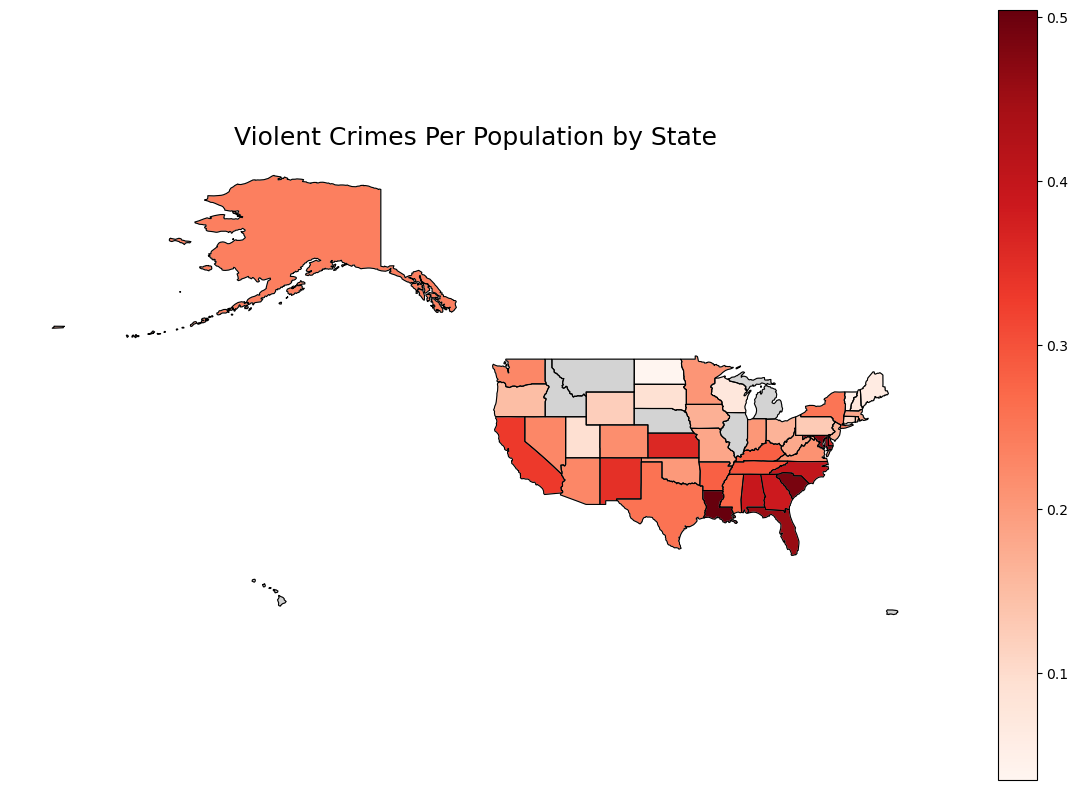

In [101]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. 下载美国州的shapefile
url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA.geo.json'
us_states = gpd.read_file(url)

# 注意 us_states 这个文件层级不一样，只画一次美国整体，无法直接细分到州
# 所以我们换一种办法：直接用官方美国50州shapefile！

# 重新正确下载美国州界数据：
us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# 2. 标准化州名字
state_crime_avg_clean['state_name'] = state_crime_avg_clean['state_name'].str.title()

# 3. 合并数据
us_states = us_states.merge(state_crime_avg_clean, left_on='name', right_on='state_name', how='left')

# 4. 画图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 画州边界
us_states.boundary.plot(ax=ax, linewidth=0.8, color='black')

# 画犯罪率
us_states.plot(column='ViolentCrimesPerPop',
               cmap='Reds',
               linewidth=0.8,
               ax=ax,
               edgecolor='0.8',
               missing_kwds={"color": "lightgrey"},
               legend=True)

plt.title('Violent Crimes Per Population by State', fontsize=18)
plt.axis('off')
plt.show()
